In [2]:
import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from ft_finetuning import *
from common_helpers import *
from plotting_helper import *

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
gpu, cpu = get_devices()

# Single modality

In [4]:
!pip install fasttext -q

     |████████████████████████████████| 68 kB 4.3 MB/s 


In [6]:
!wget https://storage.googleapis.com/ai4bharat-public-indic-nlp-corpora/embedding-v2/indicnlp.ft.te.300.bin

--2021-11-27 14:49:35--  https://storage.googleapis.com/ai4bharat-public-indic-nlp-corpora/embedding-v2/indicnlp.ft.te.300.bin
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3247803187 (3.0G) [application/octet-stream]
Saving to: ‘indicnlp.ft.te.300.bin’

indicnlp.ft.te.300. 100%[===================>]   3.02G  49.7MB/s    in 54s     

2021-11-27 14:50:30 (57.8 MB/s) - ‘indicnlp.ft.te.300.bin’ saved [3247803187/3247803187]



In [8]:
import fasttext
data = pd.read_json('/content/drive/MyDrive/annamayya_dataset_cleaned.json')
ft = fasttext.load_model('indicnlp.ft.te.300.bin')
data['indic_ft_vectors'] = data.apply(lambda x: ft.get_sentence_vector(x['Lyric']), axis=1)

In [10]:
data['iGenre'] = data.apply(lambda x:1 if x['genre']=='Devotional' else 0,axis=1)

In [13]:
ft_txt_only_results = run_k_fold(gpu, data, 'indic_ft_vectors', fusion=FusionTypes.TXT, k_folds=5,
                              epochs=250, balance_classes=True,
                              dropout_level=0.1, lr=1e-5,
                              clip_at=None)

Running Text Only Classification
FOLD 0
Class Weights : [0.6217202  2.55389088]
Epoch 1 / 250, Train Loss : 0.546 / Validation Loss : 0.515 [Time: 1.977702 seconds]
Epoch 2 / 250, Train Loss : 0.485 / Validation Loss : 0.531 [Time: 2.00413 seconds]
Epoch 3 / 250, Train Loss : 0.494 / Validation Loss : 0.526 [Time: 1.976142 seconds]
Epoch 4 / 250, Train Loss : 0.490 / Validation Loss : 0.520 [Time: 1.99337 seconds]
Epoch 5 / 250, Train Loss : 0.484 / Validation Loss : 0.517 [Time: 1.978237 seconds]
Epoch 6 / 250, Train Loss : 0.477 / Validation Loss : 0.512 [Time: 1.958804 seconds]
Epoch 7 / 250, Train Loss : 0.469 / Validation Loss : 0.508 [Time: 1.987385 seconds]
Epoch 8 / 250, Train Loss : 0.462 / Validation Loss : 0.501 [Time: 1.971463 seconds]
Epoch 9 / 250, Train Loss : 0.451 / Validation Loss : 0.497 [Time: 1.945185 seconds]
Epoch 10 / 250, Train Loss : 0.440 / Validation Loss : 0.491 [Time: 2.006691 seconds]
Epoch 11 / 250, Train Loss : 0.428 / Validation Loss : 0.482 [Time: 1.9

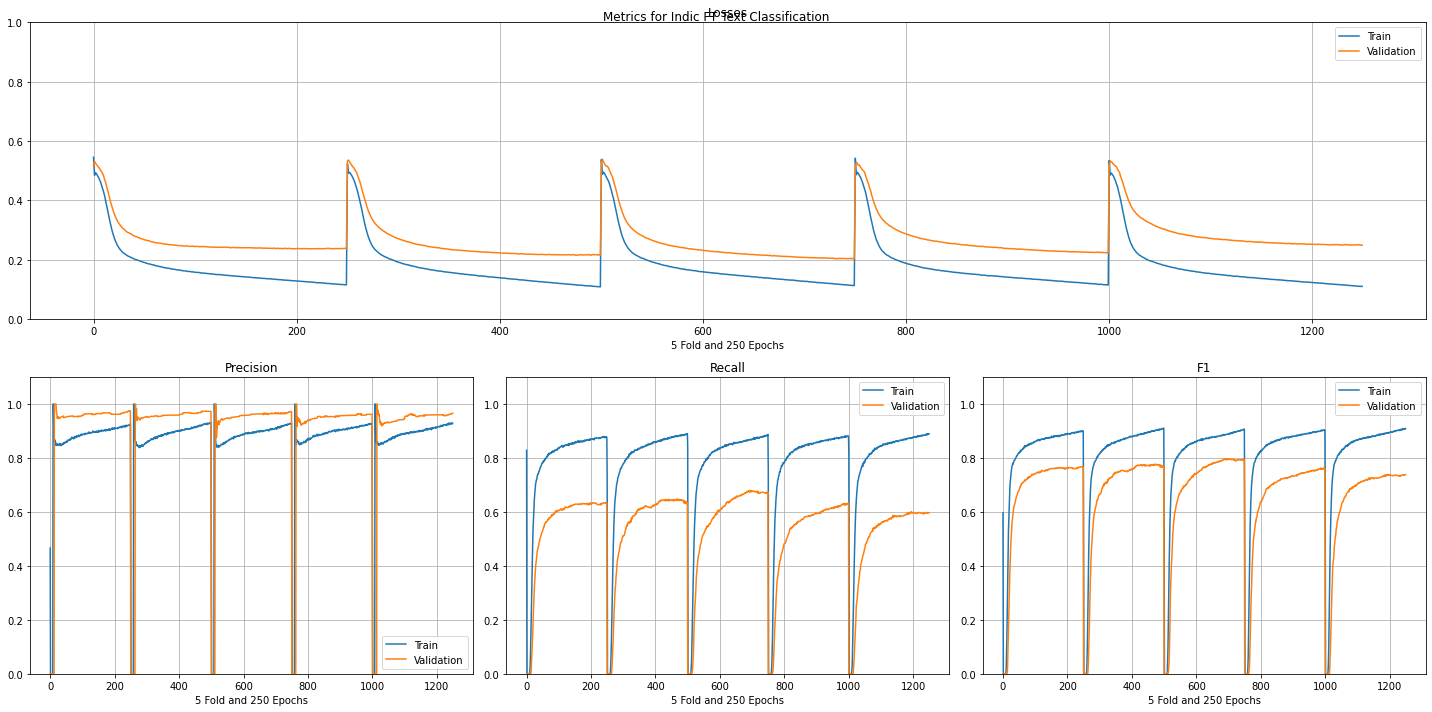

In [14]:
plot_results(ft_txt_only_results[0],'Indic FT Text Classification')

In [15]:
ft_txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
192,0.886654,0.797482,0.906966,0.964467,0.867233,0.679785,0.130152,0.208840
204,0.890414,0.796218,0.911903,0.964377,0.869915,0.677996,0.126139,0.207014
198,0.887617,0.796218,0.909475,0.964377,0.866786,0.677996,0.128152,0.208513
195,0.887314,0.796218,0.907858,0.964377,0.867680,0.677996,0.128851,0.208396
194,0.887215,0.796218,0.906673,0.964377,0.868574,0.677996,0.129405,0.208888
...,...,...,...,...,...,...,...,...
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491677,0.536310
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456060,0.501155
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.494922,0.530558
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491014,0.524962


# Multi Modality

In [ ]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

In [ ]:
ft_mfcc_fusion_results = run_k_fold(gpu, data, 'indic_ft_vector', fusion=FusionTypes.MFCC, k_folds=5,
                              epochs=15, balance_classes=True,
                              dropout_level=0.2, lr=1e-4,
                              clip_at=1.0)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.698 / Validation : 0.685
Time for epoch : 0.384441 seconds
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.686
Time for epoch : 0.354019 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.685
Time for epoch : 0.374869 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.689 / Validation : 0.683
Time for epoch : 0.377922 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.677 / Validation : 0.635
Time for epoch : 0.393491 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.518 / Validation : 0.461
Time for epoch : 0.401411 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.447 / Validation : 0.378
Time for epoch : 0.796767 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.379 / Validation : 0.388
Time for epoch : 0.36443 seconds
Epoch 9 / 15
Training Model


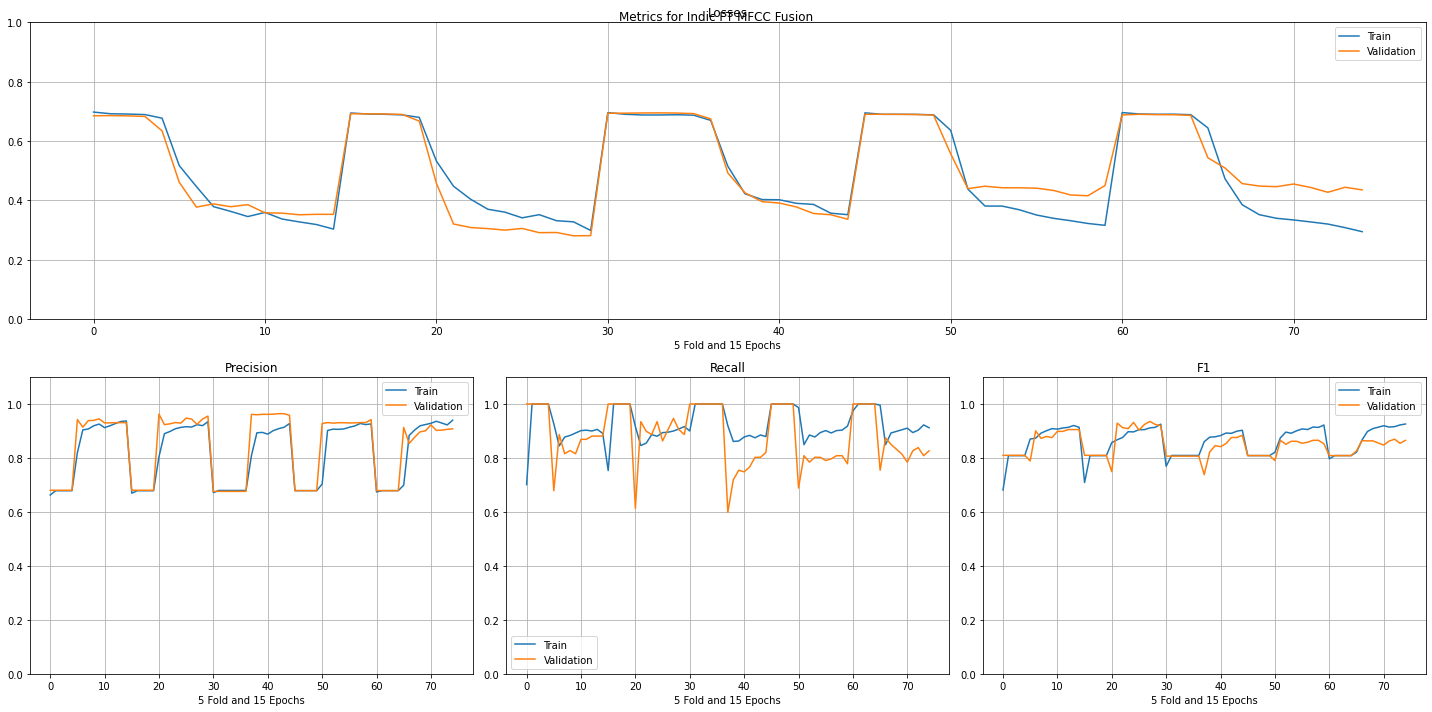

In [ ]:
plot_results(ft_mfcc_fusion_results[0], 'Indic FT MFCC Fusion')

In [ ]:
ft_mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
12,0.911431,0.935294,0.923313,0.924419,0.899851,0.946429,0.331913,0.292135
9,0.896499,0.931751,0.913178,0.928994,0.880419,0.934524,0.360622,0.300218
6,0.867433,0.928994,0.889937,0.923529,0.846039,0.934524,0.447966,0.320760
13,0.913469,0.924012,0.919697,0.944099,0.907324,0.904762,0.328011,0.280996
11,0.904834,0.924012,0.914504,0.944099,0.895366,0.904762,0.352185,0.291553
...,...,...,...,...,...,...,...,...
0,0.769133,0.806763,0.671492,0.676113,0.900000,1.000000,0.695974,0.694125
5,0.821118,0.790378,0.703191,0.927419,0.986567,0.688623,0.636296,0.557181
5,0.870175,0.788927,0.820106,0.942149,0.926756,0.678571,0.517655,0.461448
5,0.856744,0.749091,0.804462,0.962617,0.916293,0.613095,0.533023,0.458227


In [ ]:
ft_mel_fusion_results = run_k_fold(gpu, data, 'indic_ft_vector', fusion=FusionTypes.MEL, k_folds=5,
                              epochs=15, balance_classes=True,
                              dropout_level=0.2, lr=7e-4,
                              clip_at=1.0, img_path=IMG_PATH)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:440: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /pytorch/aten/src/ATen/native/Convolution.cpp:660.)
  self.padding, self.dilation, self.groups)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.700 / Validation : 0.691
Time for epoch : 635.744018 seconds
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.690
Time for epoch : 23.678355 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.643 / Validation : 0.559
Time for epoch : 23.496855 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.618 / Validation : 0.525
Time for epoch : 23.703565 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.411 / Validation : 0.395
Time for epoch : 23.634863 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.392 / Validation : 0.374
Time for epoch : 23.705232 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.360 / Validation : 0.403
Time for epoch : 23.580206 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.353 / Validation : 0.362
Time for epoch : 23.392585 seconds
Epoch 9 / 15
Trainin

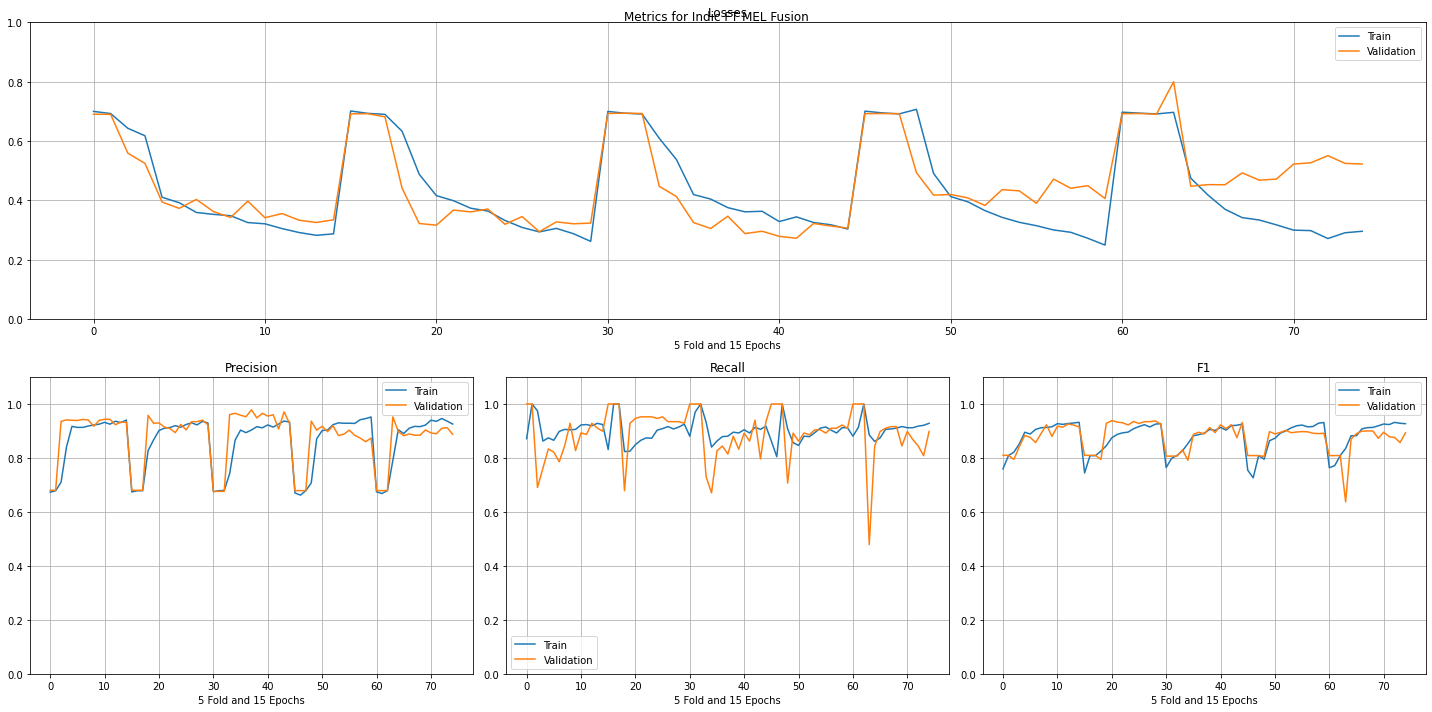

In [ ]:
plot_results(ft_mel_fusion_results[0], 'Indic FT MEL Fusion')

In [ ]:
ft_mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
5,0.874519,0.938053,0.901587,0.929825,0.849028,0.946429,0.416312,0.316725
13,0.925170,0.937313,0.935780,0.940120,0.914798,0.934524,0.287956,0.321442
9,0.908271,0.935294,0.913767,0.924419,0.902840,0.946429,0.332797,0.319732
11,0.923193,0.934524,0.930197,0.934524,0.916293,0.934524,0.294194,0.294875
12,0.914846,0.934524,0.922492,0.934524,0.907324,0.934524,0.305968,0.327832
...,...,...,...,...,...,...,...,...
3,0.795291,0.805461,0.707800,0.936508,0.907463,0.706587,0.707155,0.493782
2,0.821676,0.794521,0.710240,0.935484,0.974589,0.690476,0.643295,0.559478
3,0.825468,0.794425,0.827327,0.957983,0.823617,0.678571,0.633154,0.441234
4,0.853030,0.791519,0.866154,0.965517,0.840299,0.670659,0.538105,0.413436
